## Overview
This project explores the prediction of loan approval outcomes using a real-world dataset from Kaggle. The goal is to build a binary classification model that determines whether a loan application will be approved or rejected, based on applicant and loan-related features.


## The pipeline includes:
- **Data cleaning and preprocessing**
Handling missing values and encoding categorical features for model readiness
- **Binary classification modeling**
Training Logistic Regression and Decision Tree classifiers
- **Class imbalance handling**
Applying SMOTE to balance approved vs. rejected loan cases
- **Model evaluation**
Using confusion matrices and classification reports to assess precision, recall, and F1-score


## Feature Landscape
**Applicant & Loan Attributes:**
- Gender, marital status, education, employment status
- Income, loan amount, credit history, property area

**Modeling Techniques:**
- Logistic Regression for baseline linear performance
- Decision Tree for non-linear pattern detection
- SMOTE applied to training data to improve minority class representation
- Stratified train-test split to preserve class distribution

**Interpretability:**
- Confusion matrix analysis to visualize misclassifications
- Classification reports to compare precision, recall, and F1-score across model

In [1]:
import numpy as np
import pandas as pd

In [34]:
## Loading the dataset
df = pd.read_csv(r'loan_approval_dataset.csv')
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [38]:
df.columns = df.columns.str.strip().str.lower()

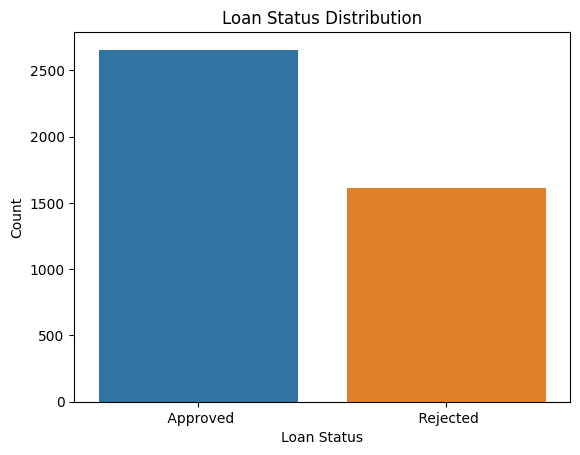

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = df['loan_status'], hue = df['loan_status'])
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [45]:
## Encoding the categorical features
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include = 'object').columns:
    df[col] = le.fit_transform(df[col])
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [46]:
## Split the features and target
from sklearn.model_selection import train_test_split

x = df.drop('loan_status', axis = 1)
y = df['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

In [47]:
## Handle Class Imbalance with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [48]:
## Train the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_regression = LogisticRegression(max_iter = 1000)
tree_model = DecisionTreeClassifier()

log_regression.fit(x_train_smote, y_train_smote)
tree_model.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier()

In [49]:
## Evaluating
from sklearn.metrics import classification_report, confusion_matrix

print('0 -> Approved\n1 -> Rejected\n')
for model, name in zip([log_regression, tree_model], ["Logistic Regression", "Decision Tree"]):
    y_pred = model.predict(x_test)
    print(f'{name} Results:')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

0 -> Approved
1 -> Rejected

Logistic Regression Results:
[[457  74]
 [ 86 237]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       531
           1       0.76      0.73      0.75       323

    accuracy                           0.81       854
   macro avg       0.80      0.80      0.80       854
weighted avg       0.81      0.81      0.81       854

Decision Tree Results:
[[522   9]
 [  9 314]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       531
           1       0.97      0.97      0.97       323

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

